# RGB to HSV conversion

In [ ]:
# defining a function

def f_rgb_to_hsv(r, g, b, scaleFactor): # function takes r value as an input, g value, b value and a scale factor. 
                                        # Scale factor determines what values, s and v are between. (r and z)
 r, g, b = r / 255.0, g / 255.0, b / 255.0 # normalising RGB values
 cmax = max(r, g, b)  # finding max value
 cmin = min(r, g, b) # finding min value
 diff = cmax - cmin # computing the difference
# calculating h
 if cmax == cmin:
     h = 0
 elif cmax == r:
     h = (60*(0 + (g - b)/(diff))) % 360 # ensuring value does not exceed 360
 elif cmax == g:
     h = (60*((2 + (b-r))/(diff))) % 360
 elif cmax == b:
     h = (60*((4 + (r-g))/(diff))) % 360
 if h < 0:
     h = h + 360
# calculating s
 if cmax == 0:
     s = 0
 else:
     s = (diff/cmax)*scaleFactor
# calculating v
 v = cmax*scaleFactor
 return h, s, v

print(f_rgb_to_hsv(100, 200, 50, 100))
     

# Using OpenCV to convert from BGR to HSV

In [ ]:
import cv2
im = cv2.imread(r'tulips.jpg')
HsvIm = cv2.cvtColor(im, cv2.COLOR_BGR2HSV) # converting from BGR to HSV
type(HsvIm)
HsvIm.shape
cv2.imshow('RGB', HsvIm)
cv2.waitKey(0)
cv2.destroyAllWindows

# Write a python command to convert HSV to RGB and BGR using open cv2

In [ ]:
import cv2
im = cv2.imread(r'tulips.jpg')
rgb = cv2.cvtColor(im, cv2.COLOR_HSV2RGB)
bgr = cv2.cvtColor(im, cv2.COLOR_HSV2BGR)
cv2.imshow('RGB', bgr)
cv2.waitKey(0)
cv2.destroyAllWindows


# Red Rose Extraction or Segmentation using HSV Python

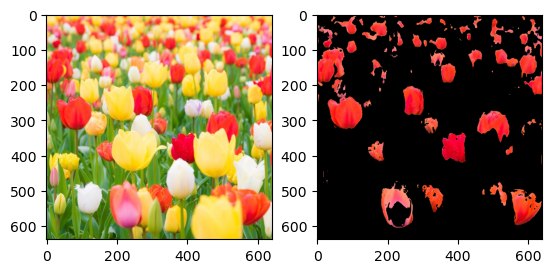

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread(r'tulips.jpg')

# convert to hsv
# remember h gives hue, which is the actual colour. It is between 0-360 and red will take certain values
# lr and ur are giving the colour range we are allowing to show
# you can google hsv colour ranges
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lr = np.array([0,120,70]) # lower red is a np array with h = 0, s = 120, v = 70
ur = np.array([8, 255, 255]) # upper red
mask1 = cv2.inRange(hsv,lr, ur) # gives a binary mask, picks all pixels in this range and ignores all others

# building another range
lr = np.array([170,120,70])
ur = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lr,ur)
mask = mask1 | mask2  # | means or
res = cv2.bitwise_and(img,img,mask=mask) # resulatant image

# plotting a figure (figure 1)
plt.figure(1)
# plotting a subplot in figure (subplot 1)
plt.subplot(121)
plt.imshow(img[:,:,::-1]) # original image
# plotting another subplot (subplot 2)
plt.subplot(122)
plt.imshow(res[:,:,::-1]) # image with only red
plt.show()


# challenge: extract yellow flowers

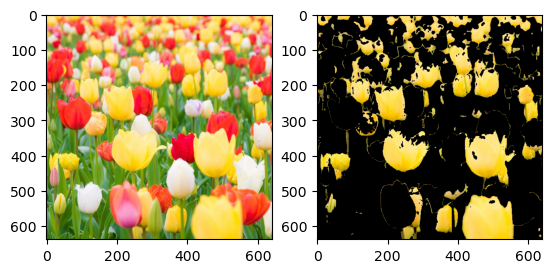

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img = cv2.imread(r'tulips.jpg')

# convert to hsv
# remember h gives hue, which is the actual colour. It is between 0-360 and yellow will take certain values
# lr and ur are giving the colour range we are allowing to show
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lr = np.array([20,100,100]) # hsv colour range for yellow (google)
ur = np.array([30, 255, 255])
mask1 = cv2.inRange(hsv,lr, ur) # gives a binary mask, picks all pixels in this range and ignores all others

res = cv2.bitwise_and(img,img,mask=mask1) # resulatant image

# plotting a figure (figure 1)
plt.figure(1)
# plotting a subplot in figure (subplot 1)
plt.subplot(121)
plt.imshow(img[:,:,::-1]) # original image
# plotting another subplot (subplot 2)
plt.subplot(122)
plt.imshow(res[:,:,::-1]) # image with only yellow
plt.show()
